Sugestões de bibliotecas para serem utilizadas:

Pandas, NumPy, Seaborn, Matplotlib, Statsmodels, Scipy Considerando a base de dados kc_house_data.csv responda as questões de 1 a 6 abaixo:


In [1]:
!pip install statsmodels


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [2]:
#importando bib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import f_oneway

In [3]:
df_casa = pd.read_csv('kc_house_data.csv')
df_casa.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,n,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,n,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,n,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,n,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,n,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df_casa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9999 non-null   int64  
 1   date           9999 non-null   object 
 2   price          9999 non-null   float64
 3   bedrooms       9999 non-null   int64  
 4   bathrooms      9999 non-null   float64
 5   sqft_living    9999 non-null   int64  
 6   sqft_lot       9999 non-null   int64  
 7   floors         9999 non-null   float64
 8   waterfront     9999 non-null   object 
 9   view           9999 non-null   int64  
 10  condition      9999 non-null   int64  
 11  grade          9999 non-null   int64  
 12  sqft_above     9999 non-null   int64  
 13  sqft_basement  9999 non-null   int64  
 14  yr_built       9999 non-null   int64  
 15  yr_renovated   9999 non-null   int64  
 16  zipcode        9999 non-null   int64  
 17  lat            9999 non-null   float64
 18  long    

In [5]:
#Conversão de valores
df_casa['date'] = pd.to_datetime(df_casa['date'])
df_casa['bathrooms'] = df_casa['bathrooms'].astype('int64')
df_casa['floors'] = df_casa['floors'].astype('int64')
df_casa = df_casa.drop(columns=['sqft_living15', 'sqft_lot15'])

1. Codifique e exiba a matriz de correlação entre as variáveis numéricas. Além disso, qual é a correlação entre o preço price e o número de quartos bedrooms? Existe alguma diferença na correlação quando consideramos apenas casas com uma área total sqft_living superior a 2000 pés quadrados?

In [6]:
num_casas = df_casa.select_dtypes(include=['float64', 'int64'])
corr1 = num_casas.corr()

In [7]:
corr_price = num_casas.corrwith(df_casa['price'])
corr1 = pd.DataFrame(corr_price, columns=['Correlation'])

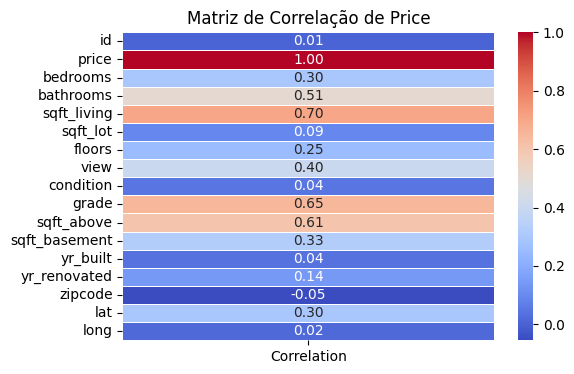

In [8]:
plt.figure(figsize=(6,4))
sns.heatmap(corr1, annot=True, cmap='coolwarm', fmt=".2f", linewidths =0.5)
plt.title('Matriz de Correlação de Price')
plt.show()

_Resposta: Correlação entre preço e quartos 0.3, fraca correlação positiva_

In [10]:
num_casas1_2 = df_casa.loc[df_casa['sqft_living'] >= 2000].select_dtypes(include=['float64', 'int64'])
corr_price1_2 = num_casas1_2.corrwith(df_casa['price'])
corr1_2 = pd.DataFrame(corr_price1_2, columns=['Correlation'])

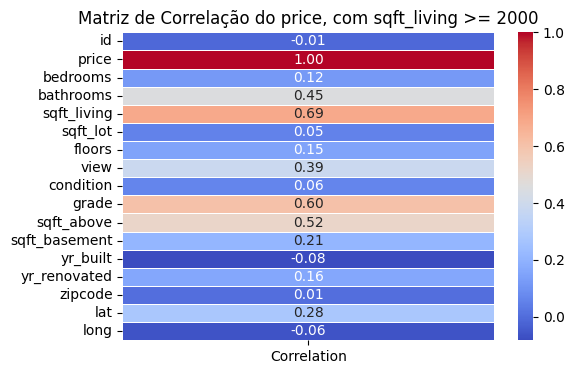

In [11]:
plt.figure(figsize=(6, 4))
sns.heatmap(corr1_2, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação do price, com sqft_living >= 2000')
plt.show()

_Resposta: Para casas com valor igual e superior de 2000 sqft_living, a correlação continua positiva mais fica ainda menor, com apenas 0.12._

-----

2. Existe alguma correlação entre o preço price e a área total da casa sqft_living, considerando apenas casas com pelo menos dois banheiros bathrooms?


In [12]:
num_casas2 = df_casa.loc[df_casa['bathrooms'] >= 2].select_dtypes(include=['float64', 'int64'])
corr_price2 = num_casas2.corrwith(df_casa['price'])
corr2 = pd.DataFrame(corr_price2, columns=['Correlation'])

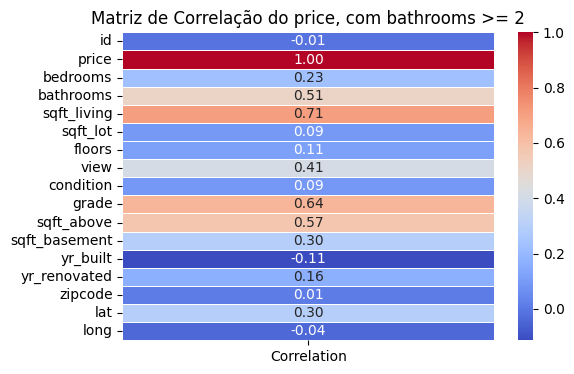

In [13]:
plt.figure(figsize=(6, 4))
sns.heatmap(corr2, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação do price, com bathrooms >= 2')
plt.show()

_Resposta: A correlação entre o price e sqft_living para casas com um número igual ou superior a dois banheiros é de 0.71, uma forte correlação positiva._

-----------

3. Como a quantidade de banheiros bathrooms influencia na correlação entre a área total da casa sqft_living e o preço price?


In [14]:
df_casa['bathrooms'].mean()

1.7037703770377037

_Resposta: Sabendo que a média de banheiros por casa é de 1.7, se observa na primeira correlação entre price e sqft_living é de 0.7, enquanto a segunda com casas com número maior ou superior a dois banheiros é de 0.71. Logo se pode deduzir que a quantidade de banheiros possui uma pequena influência positiva na correlação entre price e sqft_living_

---------

4. Qual é a relação entre a condição da casa condition e o preço price, considerando apenas casas com uma área total sqft_living superior a 3000 pés quadrados?


In [15]:
num_casas4 = df_casa.loc[df_casa['sqft_living'] > 3000].select_dtypes(include=['float64', 'int64'])
corr_price4 = num_casas4.corrwith(df_casa['price'])
corr4 = pd.DataFrame(corr_price4, columns=['Correlation'])

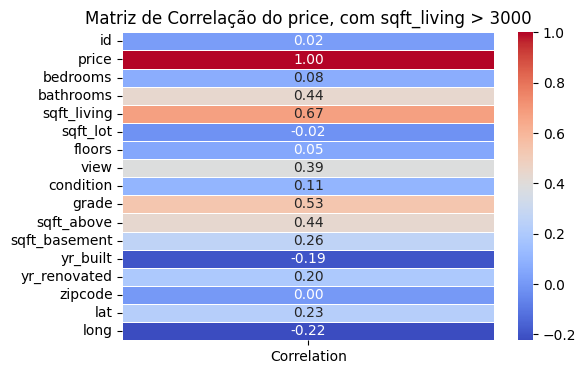

In [16]:
plt.figure(figsize=(6, 4))
sns.heatmap(corr4, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação do price, com sqft_living > 3000')
plt.show()


_Resposta: A correlação entre price e condition com casas de sqft_living superior a 3000 é de 0.11, uma baixa correlação positiva._

----------

5. Existe alguma correlação entre a localização geográfica lat e long e o preço price para casas com pelo menos três quartos bedrooms? 


In [17]:
num_casas5 = df_casa.loc[df_casa['bedrooms'] >= 3].select_dtypes(include=['float64', 'int64'])
corr_price5 = num_casas5.corrwith(df_casa['price'])
corr5 = pd.DataFrame(corr_price4, columns=['Correlation'])

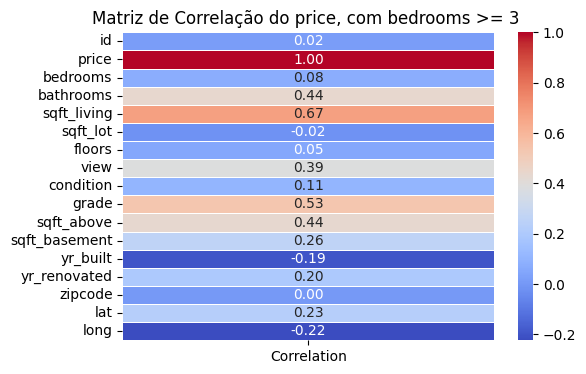

In [18]:
plt.figure(figsize=(6, 4))
sns.heatmap(corr5, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação do price, com bedrooms >= 3 ')
plt.show()

_Resposta: As correlações entre price e lat e long, respectivamente, para casas com número maior ou igual a 3 bedrooms(quartos) são de 0.23 e -0.22, tendo fracas correlações positivas e negativas._

--------


6. Calcule a correlação entre uma variável categórica(waterfront) e uma variável numérica(price) usando ANOVA.


- H0: Não existe correlação significativa entre waterfront e price
- H1: Existe correlação significativa entre waterfront e price

In [19]:
mask_waterfront_y = df_casa['waterfront'] == 'y'
mask_waterfront_n = df_casa['waterfront'] == 'n'
price_waterfront_y = df_casa['price'][mask_waterfront_y]
price_waterfront_n = df_casa['price'][mask_waterfront_n]

In [20]:
waterfront_anova = f_oneway(price_waterfront_y, price_waterfront_n)

In [21]:
if waterfront_anova.pvalue > 0.05:
    print("O p valor é maior que 0.05, logo podemos descartar a hipotese nula.")
else:
    print("O p valor é menor que 0.05, logo a hipótese nula não pode ser descartada.")

O p valor é menor que 0.05, logo a hipótese nula não pode ser descartada.


---------------


Considerando a base de dados car_price.csv responda as questões de 7 a 11 abaixo:


In [22]:
df_carro = pd.read_csv('car_price.csv')
df_carro.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [23]:
df_carro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1874 entries, 0 to 1873
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1874 non-null   object 
 1   Model               1874 non-null   object 
 2   Price               1874 non-null   int64  
 3   Year                1874 non-null   int64  
 4   Kilometer           1874 non-null   int64  
 5   Fuel Type           1874 non-null   object 
 6   Transmission        1874 non-null   object 
 7   Location            1874 non-null   object 
 8   Color               1874 non-null   object 
 9   Owner               1874 non-null   object 
 10  Seller Type         1874 non-null   object 
 11  Engine              1874 non-null   object 
 12  Max Power           1874 non-null   object 
 13  Max Torque          1874 non-null   object 
 14  Drivetrain          1874 non-null   object 
 15  Length              1874 non-null   float64
 16  Width 

In [24]:
#Transformando a coluna Engine em int, primeiramente separando os caracteres númericos em uma coluna distinta e excluindo o resto
df_carro[['Engine cc', 'cc']] = df_carro['Engine'].str.split(' ',expand=True)

In [25]:
df_carro = df_carro.drop(columns=['Engine', 'cc'])

In [26]:
df_carro['Engine cc'] = df_carro['Engine cc'].astype('int64')

In [27]:
df_carro.describe()

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Engine cc
count,1.874000e+03,1874.000000,1.874000e+03,1874.000000,1874.000000,1874.000000,1874.000000,1874.000000,1874.000000
mean,1.718279e+06,2016.713447,5.317814e+04,4281.512807,1767.886339,1588.967983,5.295091,52.217343,1682.829242
std,2.426090e+06,3.138477,5.878833e+04,436.220747,131.344883,134.627659,0.807008,15.167250,633.055721
min,4.900000e+04,1988.000000,0.000000e+00,3099.000000,1475.000000,1213.000000,2.000000,15.000000,624.000000
25%,5.000000e+05,2015.000000,2.801975e+04,3985.000000,1695.000000,1485.000000,5.000000,42.000000,1197.000000
50%,8.424995e+05,2017.000000,4.879750e+04,4360.000000,1770.000000,1544.000000,5.000000,50.000000,1497.000000
75%,1.908250e+06,2019.000000,7.100000e+04,4620.000000,1831.000000,1670.750000,5.000000,60.000000,1995.000000
max,3.500000e+07,2022.000000,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000,6592.000000


7. Codifique e exiba a Matriz de correlação para as variáveis numéricas e dê exemplos de correlações positivas, negativas e neutras.


In [28]:
num_carros = df_carro.select_dtypes(include=['float64', 'int64'])
corr_carros = num_carros.corr()

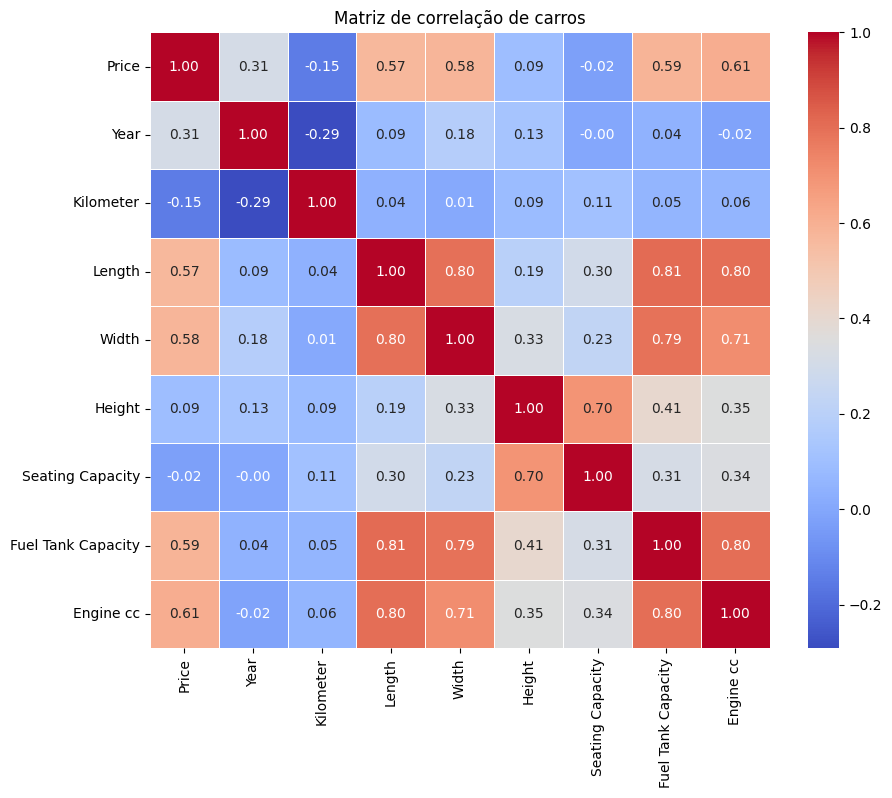

In [29]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_carros, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de correlação de carros')
plt.show()

_Resposta: Como exemplo de correlações, temos:_
- Positiva: Forte correlação entre Lenght (comprimento) e Fuel Tank Capacity (Capacidade do tanque de combustível) de 0.81
- Neutra: Correlação de Kilometer (quilometragem do veículo) e Fuel Tank Capacity, de apenas 0.05
- Negativa: Baixa correlação entre Kilometer e Year (ano), de -0.29

------

8. Codifique e exiba Gráficos de Dispersão para cada uma das variáveis numéricas em relação à variável de interesse Price.

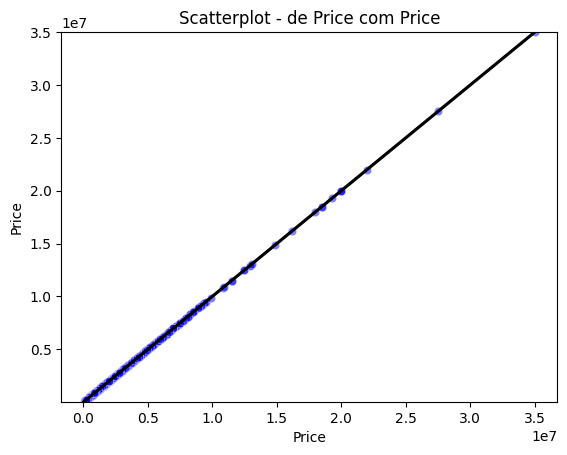

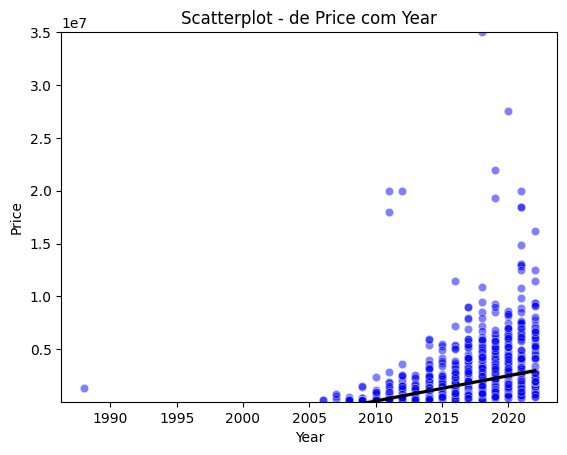

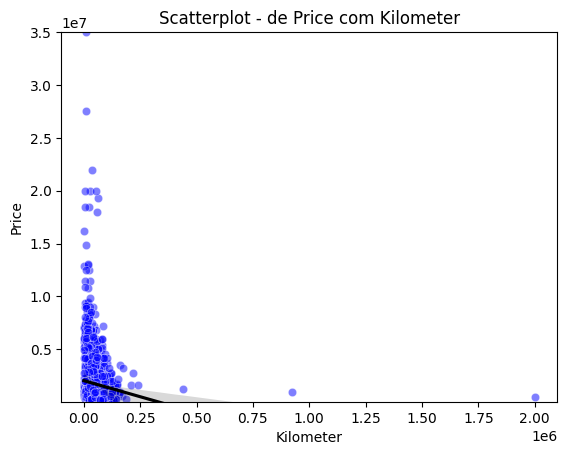

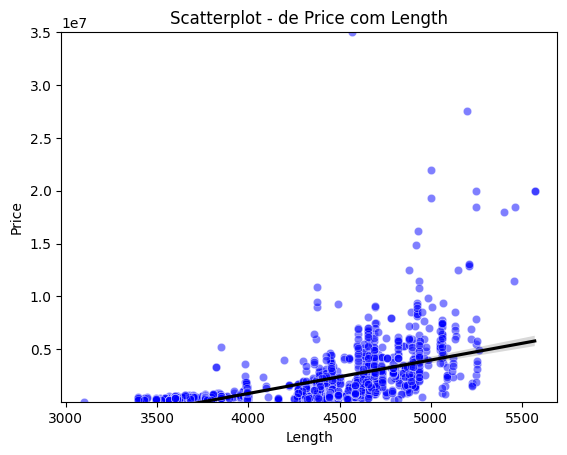

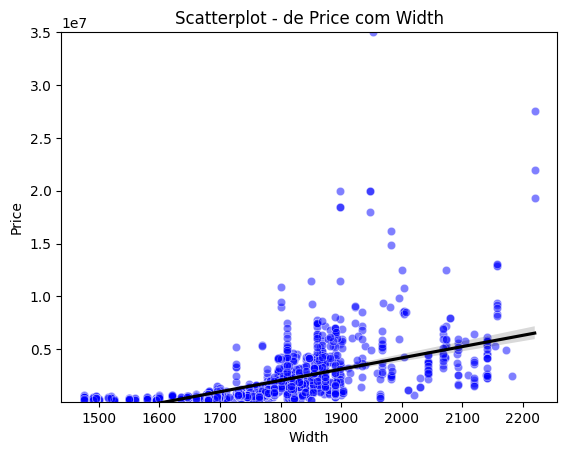

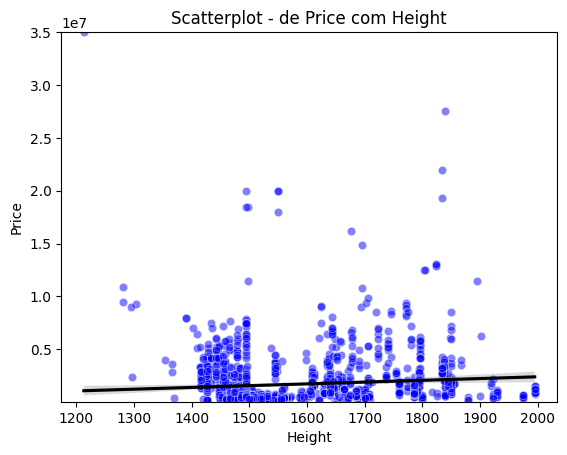

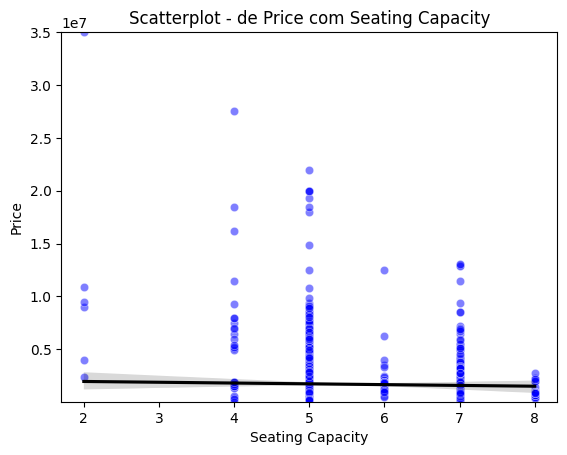

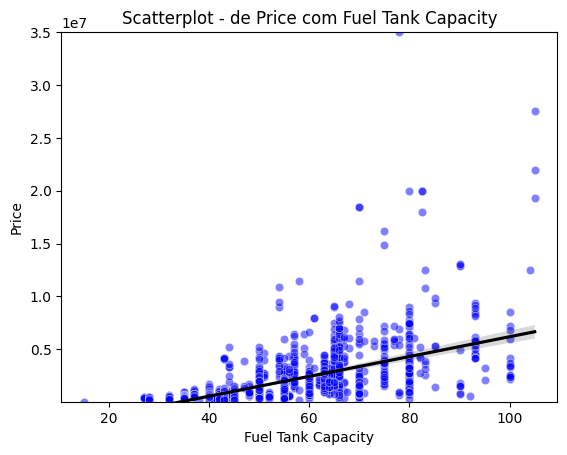

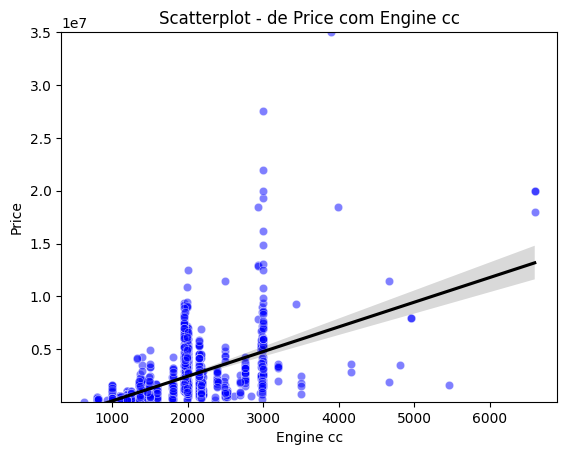

In [30]:
for n in num_carros.columns:
    sns.scatterplot(data=df_carro, x=n, y='Price', color='blue', alpha=0.5)
    sns.regplot(data=df_carro, x=n, y='Price', scatter=False, color='black')
    plt.ylim(num_carros['Price'].min(), num_carros['Price'].max())
    plt.title(f'Scatterplot - de Price com {n}')
    plt.show()  

9. Crie um modelo de Regressão Linear Simples, exiba a Tabela de Regressão e exiba o plot da Reta Estimada.

In [31]:
#Para fazer modelo de regressão linear simples de Preço e todas as variáveis numéricas, utilizar o loop abaixo
'''
for n in num_carros:
    x = sm.add_constant(num_carros[n])
    y = num_carros['Price']

    model = sm.OLS(y, x).fit()
    print(model.summary())
'''

"\nfor n in num_carros:\n    x = sm.add_constant(num_carros[n])\n    y = num_carros['Price']\n\n    model = sm.OLS(y, x).fit()\n    print(model.summary())\n"

In [32]:
'''Para fins de demonstrativo, exibindo apenas a tabela de Price com Engine cc,
 que foi visto anteriormente sendo o valor de correlação positiva mais forte'''
x9 = sm.add_constant(df_carro['Engine cc'])
y9 = df_carro['Price']
model9 = sm.OLS(y9, x9).fit()
print(model9.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     1106.
Date:                Mon, 08 Jul 2024   Prob (F-statistic):          5.28e-191
Time:                        21:00:05   Log-Likelihood:                -29775.
No. Observations:                1874   AIC:                         5.955e+04
Df Residuals:                    1872   BIC:                         5.956e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.212e+06   1.26e+05    -17.523      0.0

10. Codifique e exiba o gráfico dos resíduos do modelo de Regressão Simples.

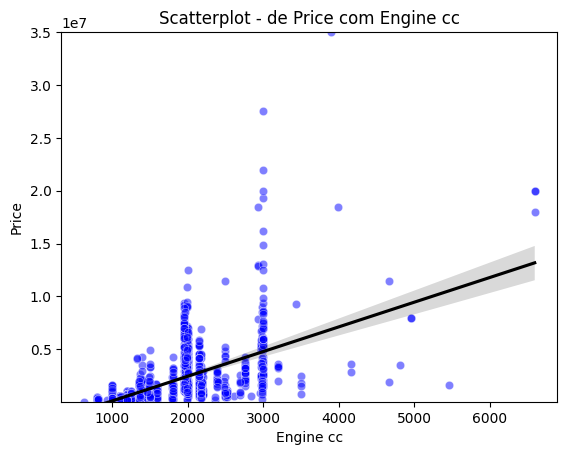

In [33]:
#Utilizando Price x Engine cc
sns.scatterplot(data=df_carro, x='Engine cc', y='Price', color='blue', alpha=0.5)
sns.regplot(data=df_carro, x='Engine cc', y='Price', scatter=False, color='black')
plt.ylim(num_carros['Price'].min(), num_carros['Price'].max())
plt.title('Scatterplot - de Price com Engine cc')
plt.show()  

In [34]:
residuals10 = model9.resid
predicted_values10 = model9.fittedvalues

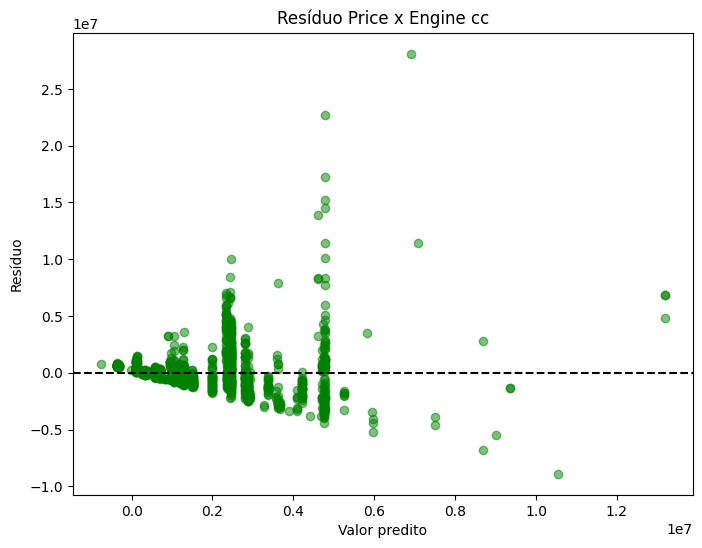

In [35]:
plt.figure(figsize=(8, 6))
plt.scatter(predicted_values10, residuals10, color='green', alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Resíduo Price x Engine cc')
plt.xlabel('Valor predito')
plt.ylabel('Resíduo')
plt.show()

11. Crie um modelo de Regressão Multivariada, exiba a Tabela de Regressão e exiba o gráfico dos resíduos do modelo.

In [36]:
var_alta_corr = corr_carros[(corr_carros['Price'] > 0.59) | (corr_carros['Price'] < 0)].index.tolist()
var_alta_corr.remove('Price')

In [37]:
selected_variables = ['Price'] + var_alta_corr
selected_df = num_carros[selected_variables]

In [38]:
x11 = sm.add_constant(selected_df.drop(columns='Price'))
y11 = selected_df['Price']
model11 = sm.OLS(y11, x11).fit()
print(model11.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     526.8
Date:                Mon, 08 Jul 2024   Prob (F-statistic):          4.41e-248
Time:                        21:01:02   Log-Likelihood:                -29636.
No. Observations:                1874   AIC:                         5.928e+04
Df Residuals:                    1870   BIC:                         5.930e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.473e+06   2.75e+05  

In [39]:
residuals11 = model11.resid
predicted_values11 = model11.fittedvalues

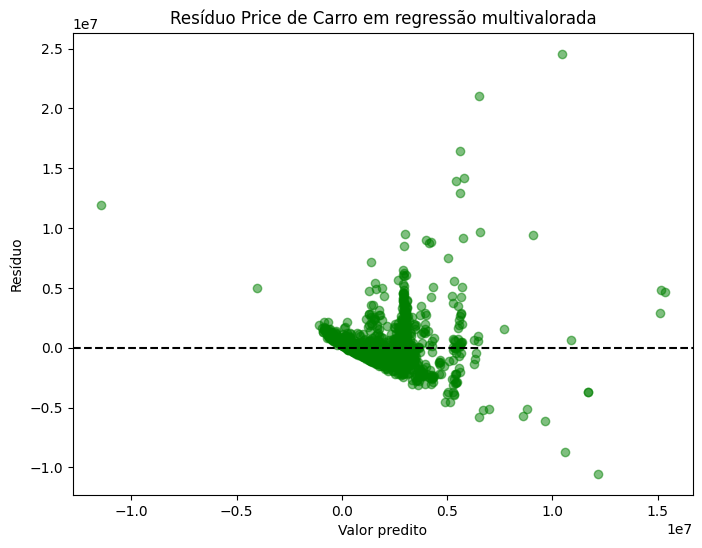

In [40]:
plt.figure(figsize=(8, 6))
plt.scatter(predicted_values11, residuals11, color='green', alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Resíduo Price de Carro em regressão multivalorada')
plt.xlabel('Valor predito')
plt.ylabel('Resíduo')
plt.show()